# Task 6.2 - Exploring Relationships

#
1. Importing Data
2. Creating Subset
3. Creating Heatmap
4. Creating Scaterplots
5. Creating Pairplot
6. Creating categorical plot
7. Questions answered
8. Hypothesis

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Create path
path = r'C:\Users\RebekkaBrandt\Documents\Immo Data Analysis'

# import file
df_immo = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'immo_data_avgfam.csv'), index_col = False)

In [3]:
df_immo.head()

,Unnamed: 0.1,Unnamed: 0,scoutId,State,Zipcode,City,totalRent,baseRent,serviceCharge,heatingCosts,...,lift,petsAllowed,garden,heatingType,picturecount,newlyConst,yearConstructed,lastRefurbish,date,rentpersqm
0,0,0,96107057,Nordrhein_Westfalen,44269,Schüren,840.0,595.0,245.00,NaN,...,False,NaN,True,central_heating,6,False,1965.0,NaN,May19,6.918605
1,2,2,113147523,Sachsen,1097,Äußere_Neustadt_Antonstadt,1300.0,965.0,255.00,NaN,...,True,NaN,False,floor_heating,8,True,2019.0,NaN,Oct19,11.515513
2,3,3,108890903,Sachsen,9599,Freiberg,NaN,343.0,58.15,87.23,...,False,NaN,False,district_heating,9,False,1964.0,NaN,May19,5.898538
3,4,4,114751222,Bremen,28213,Neu_Schwachhausen,903.0,765.0,138.00,NaN,...,False,NaN,False,self_contained_central_heating,19,False,1950.0,NaN,Feb20,9.003178
4,5,5,115531145,Schleswig_Holstein,24891,Struxdorf,NaN,315.2,142.00,NaN,...,False,no,False,gas_heating,5,False,1999.0,NaN,Feb20,5.899308


In [4]:
# creating subset with relevant data 
sub = df_immo[['Zipcode', 'baseRent', 'Sqm','noRooms', 'yearConstructed', 'rentpersqm']]

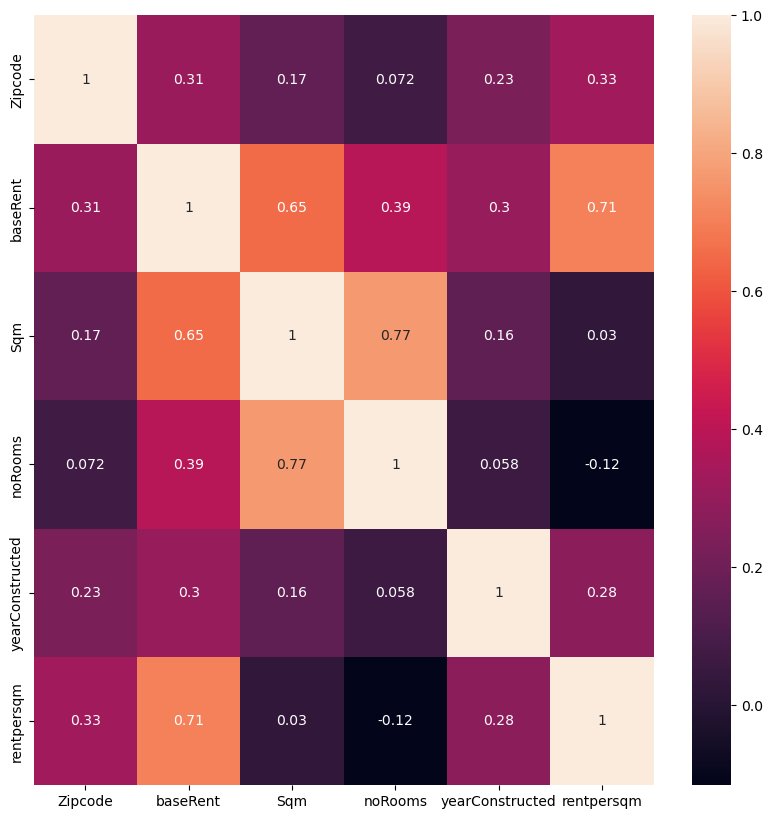

In [5]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

#
- As to be expected there is a strong postive correlation between various combinations the number of Rooms, the Square Meters, the base Rent and rent per square meter
- it is intersting to seesuch a low relationship between Sqm  and rent per Sqm
- Number of Rooms and rent per sqm is the only combination that has a negative relationship (if only weak)

In [8]:
# Save figure

corr.figure.savefig(os.path.join(path, '04 Visualization','correlation_heatmap.png'), bbox_inches='tight')

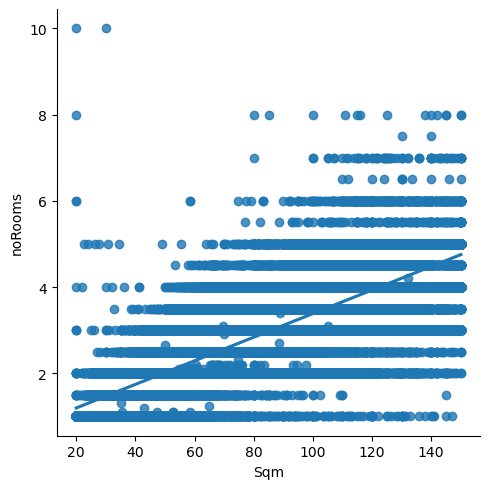

In [14]:
# Create a scatterplot for the "Sqm" and "number or Rooms" columns in seaborn

scatter_sqm_room = sns.lmplot(x = 'Sqm', y = 'noRooms', data = df_immo)

In [ ]:
#
in this Scaterplot ere we can see a clear upward trend, showing that what would be expected that the more rooms a house has the higher the amount of sqm will be. We can also see some outliers especially at the lower end of sqm with a lot of rooms. This might be due to faulty data as it is unlikely that a 10 bed property has only 20sqm
interesting however is that although number of rooms and sqm had the highest relationship the data points still stray pretty far apart.

In [15]:
# Save figure
scatter_sqm_room.savefig(os.path.join(path, '04 Visualization','scatterplotsqm_rooms.png'), bbox_inches='tight')

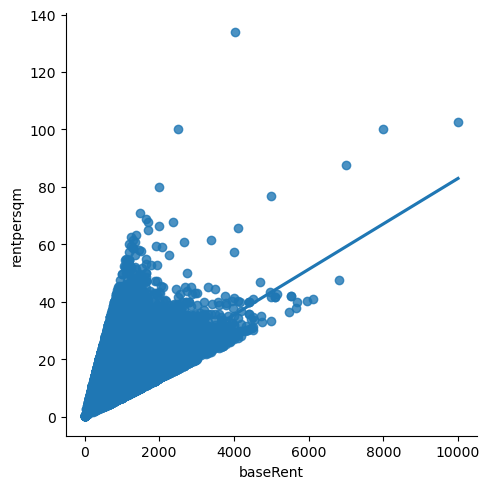

In [7]:
# Create a scatterplot for the "base Rent" and " Rent per Sqm" columns in seaborn

sns.lmplot(x = 'baseRent', y = 'rentpersqm', data = df_immo)

In [ ]:
# 
In this scaterplot an upward trend with the rent per sqm going up with the base rent, which would be expected as the rent per sqm is derived from the base rent. Also here we can see some outliers that doe however follow the trendline and could be explained by luxury properties.
Interesting in this case is however that the most data points are above the trendline, showing a fair amount of properties with a higher amout of sqm for a lower base rent

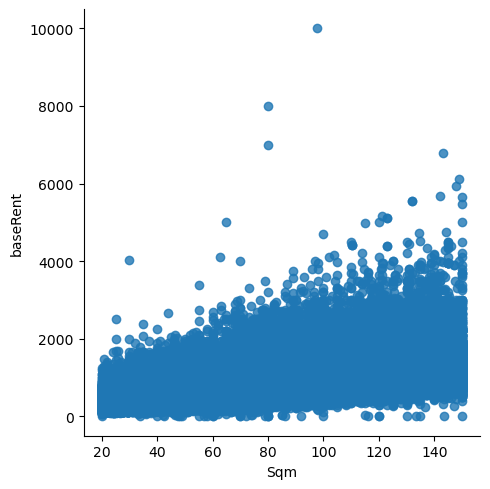

In [8]:
# Create a scatterplot for the "base Rent" and "sqm" columns in seaborn

sns.lmplot(x = 'Sqm', y = 'baseRent', data = df_immo)

In [ ]:
#
Similar to the scaterplot above we can see a upward trend with base rent going up the higher the sqm get, accompanied by the occasional outliers. We can see a bit more of a spread in the hgiher range of sqm where we can see higher rents as well

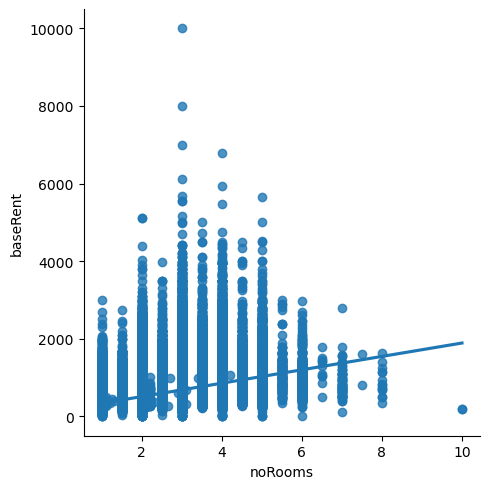

In [10]:
# Create a scatterplot for the "no of Rooms" and "baseRent" columns in seaborn

sns.lmplot(x = 'noRooms', y = 'baseRent', data = df_immo)

In [ ]:
#
looking at a scaterplot for a medium relatiationship we can see the mild upward trend showing the higher the number of rooms  the higher the base rent.
Interesting however is to see that there this seems to be more of a curve, with the the base rent goint high for properties with 3-5 rooms and then droping again. This will most likely be related to demand and availability.

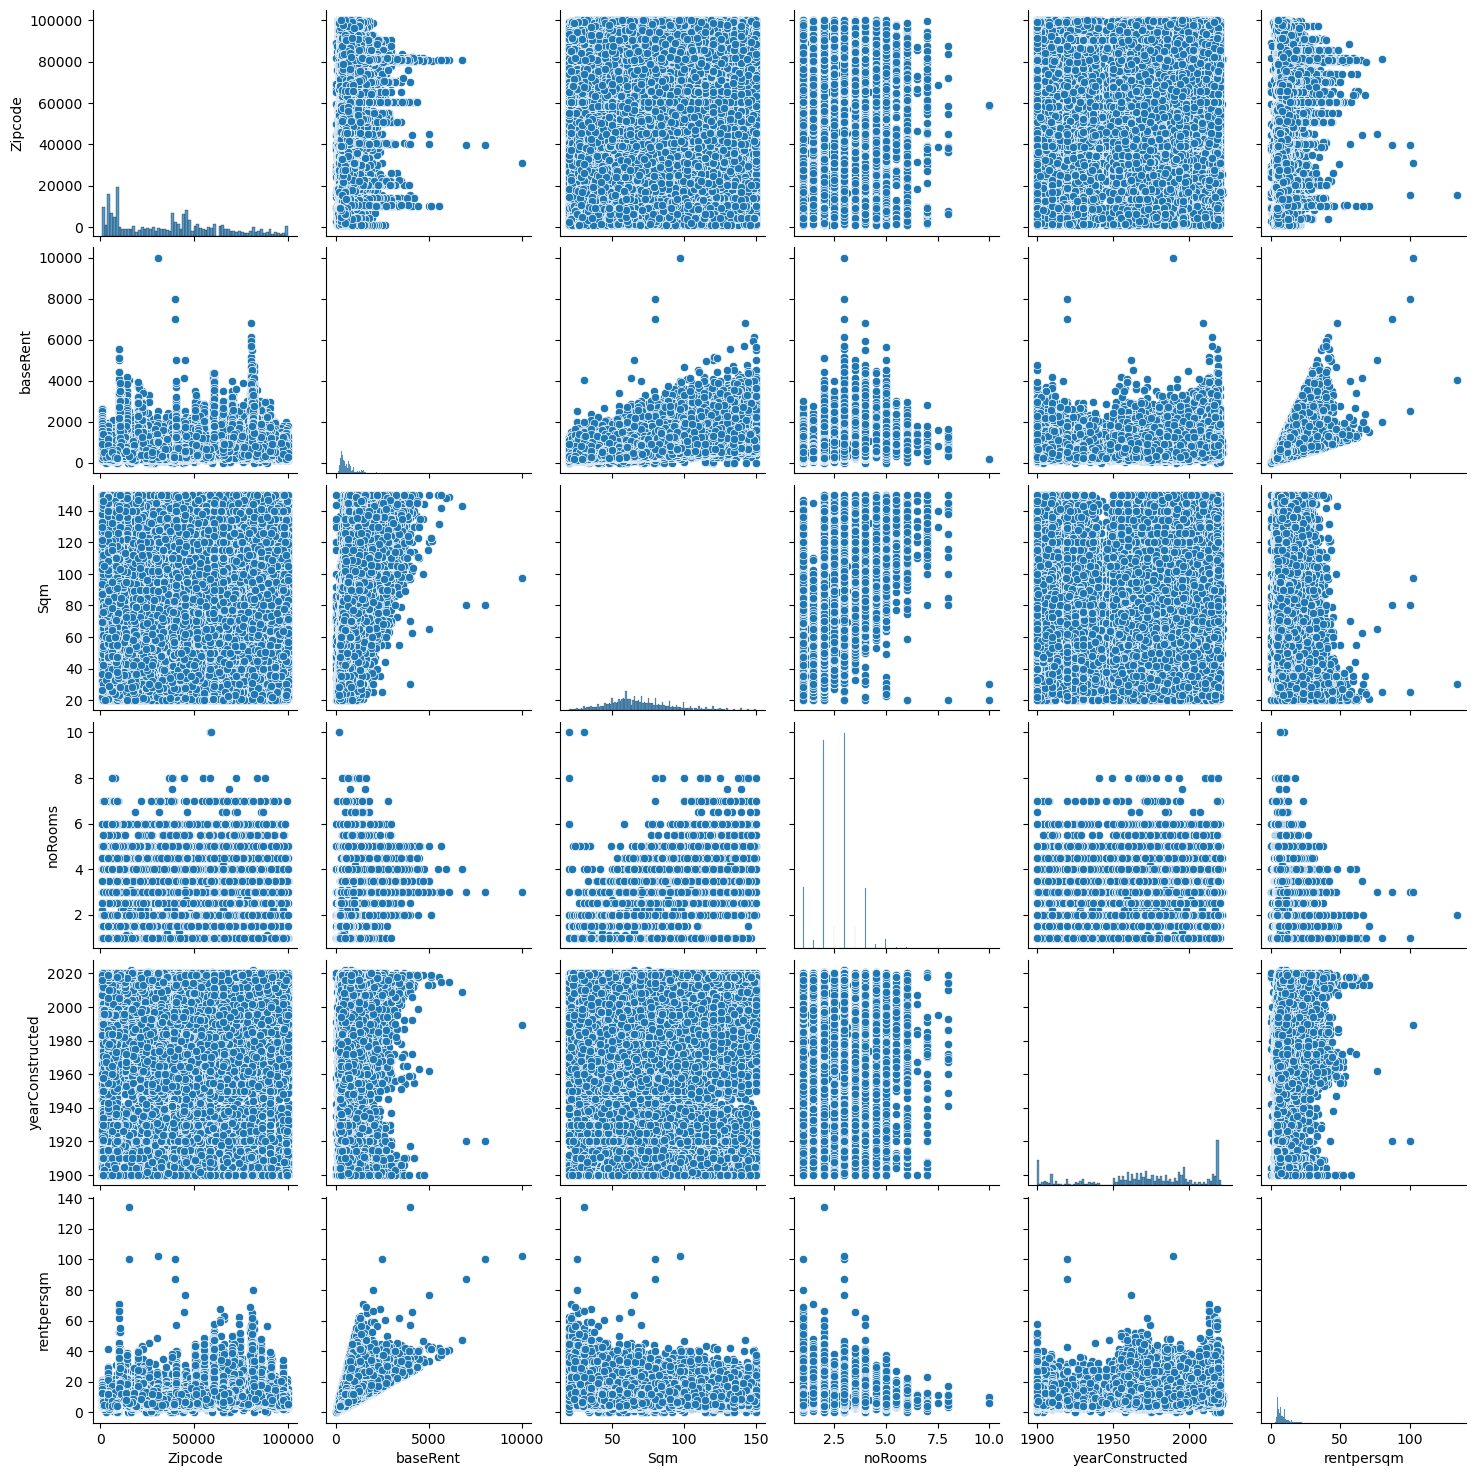

In [16]:
# Create a pair plot 

g = sns.pairplot(sub)

In [ ]:
# 
in this Pair plot we can see a lot of interesting facts. Addtionally to what has been discussed in the above scaterplots here are some other interesting examples
As to be expected we can see that the zip code has little relatinship with a lot of the other categories. But we can see some impact on the rental cost (base rent & rent per sqm) as there seem be higher cost around the zipcode cluster 8000 and 1000 /2000 
Interessting also is the only negative relationship that we saw in the heatmap where the rentper sqm goes down. Although the heatmap shows a weak relationship the datapoints seem to show a steaper decline that was originally expected.


In [17]:
# Save figure

g.savefig(os.path.join(path, '04 Visualization','pairplot.png'), bbox_inches='tight')

<Axes: xlabel='Zipcode', ylabel='Count'>

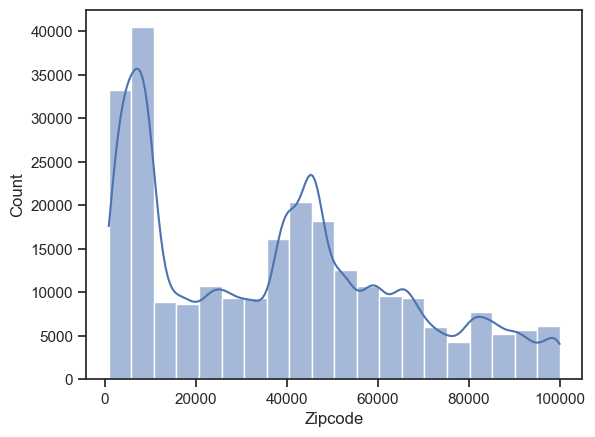

In [39]:
# Use a histogram to visualize the distribution of the variables. 
sns.histplot(df_immo['Zipcode'], bins =20, kde = True)

<Axes: xlabel='Sqm', ylabel='Count'>

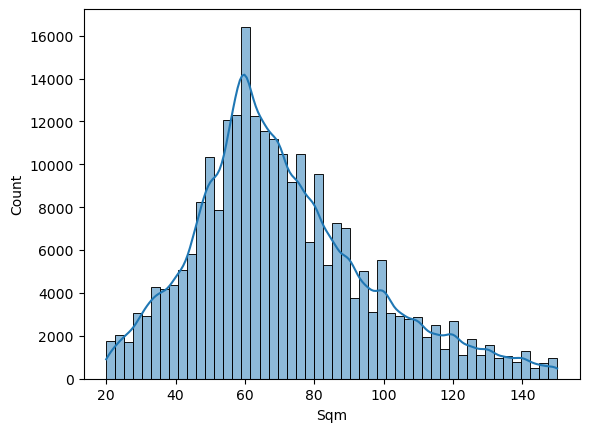

In [24]:
# Use a histogram to visualize the distribution of the variables. 
sns.histplot(df_immo['Sqm'], bins =50, kde = True)

In [26]:
df_immo.loc[df_immo['Sqm'] < 50, 'Sqm category'] = 'Low Sqm'

In [27]:
df_immo.loc[(df_immo['Sqm'] >= 50) & (df_immo['Sqm'] < 100), 'Sqm category'] = 'Middle Sqm'

In [28]:
df_immo.loc[df_immo['Sqm'] >= 100, 'Sqm category'] = 'High Sqm'

In [29]:
df_immo['Sqm category'].value_counts(dropna = False)

Middle Sqm    170182
Low Sqm        47167
High Sqm       35227
Name: Sqm category, dtype: int64

C:\ProgramData\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


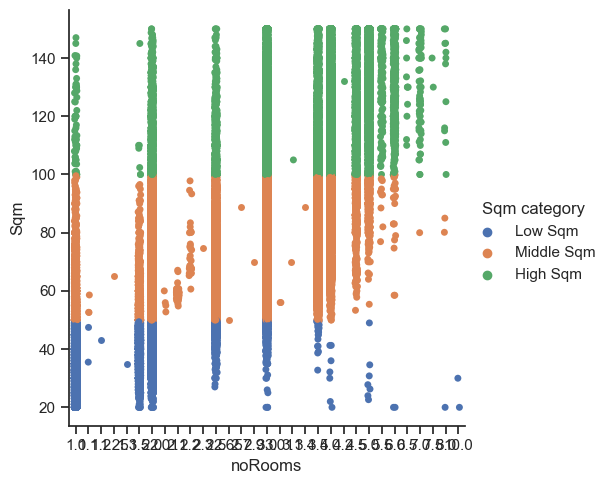

In [37]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="noRooms", y="Sqm", hue="Sqm category", data=df_immo)

#
The chart shows what is generally to be expected that more rooms means higher sqm. But we can also see a fair share of properties with a lower number of rooms beeing quite large (quite a few data points for 1 bedrooms with more than 100sqm) 

## Questions Answered:
#### What are the areas with highest and lowest rental cost?
This will need to be addressed further as we look at the actual states, but we have seen an indication that rent is higher in areas within 8000,2000 and 1000 with a small spike and some outliers in the 4000s

#### What size /no of room flats are advertised most and does this differ in regions
The most flats that are adverised are in the midrange size between 50-100 sqm, with around 60sqm beeing the most popular. Based on Zipcodes only there does not seem to be a difference between the regions

#### Where are the most and least apartments advertised and does this correlate with the rental cost
The most properties are advertised in the around the 1000 zipcode followed by the 4000/5000 area. Further analysis will need to be done to see how this correlates with the rental cost, but we know the cost is higher in the 1000 area and we have some outlieser in the 4000 area.

## Hypothesis:
1) The rent per sqm for "in demand" appartments (in the medium size range) is higher than the rent per sqm for the less "in demand" properties (small and large size)
